In [2]:
import pandas as pd 

from google.colab import files 

uploaded = files.upload()

Saving for_anaysis_df to for_anaysis_df (2)


In [0]:
import pandas as pd

for_analysis = pd.read_csv('for_anaysis_df')

In [0]:
for_analysis = for_analysis.drop(columns='Unnamed: 0')

In [0]:
X = for_analysis.drop(columns=['Sold not Sold'])
y = for_analysis['Sold not Sold']

In [0]:
for_analysis

In [20]:
# !pip install tpot
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

pipeline_optimizer = TPOTClassifier(generations=20, population_size=50, cv=3, scoring='accuracy', random_state=42, n_jobs = -1, verbosity=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline_optimizer.fit(X_train, y_train)

pipeline_optimizer.export('tpot_6-accuracy.py')

Optimization Progress:  10%|▉         | 100/1050 [00:09<01:59,  7.94pipeline/s]

Generation 1 - Current best internal CV score: 0.7066433566433566


Optimization Progress:  14%|█▍        | 150/1050 [00:18<02:10,  6.88pipeline/s]

Generation 2 - Current best internal CV score: 0.7117715617715618


Optimization Progress:  19%|█▉        | 200/1050 [00:27<03:14,  4.38pipeline/s]

Generation 3 - Current best internal CV score: 0.7117715617715618


Optimization Progress:  24%|██▍       | 250/1050 [00:33<01:28,  9.02pipeline/s]

Generation 4 - Current best internal CV score: 0.7117715617715618


Optimization Progress:  29%|██▊       | 300/1050 [00:42<02:03,  6.10pipeline/s]

Generation 5 - Current best internal CV score: 0.727039627039627


Optimization Progress:  33%|███▎      | 350/1050 [00:51<01:00, 11.63pipeline/s]

Generation 6 - Current best internal CV score: 0.727039627039627


Optimization Progress:  38%|███▊      | 400/1050 [01:00<01:40,  6.46pipeline/s]

Generation 7 - Current best internal CV score: 0.727039627039627


Optimization Progress:  43%|████▎     | 450/1050 [01:12<01:54,  5.23pipeline/s]

Generation 8 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  48%|████▊     | 500/1050 [01:27<02:21,  3.88pipeline/s]

Generation 9 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  52%|█████▏    | 550/1050 [01:46<02:05,  3.98pipeline/s]

Generation 10 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  57%|█████▋    | 600/1050 [01:57<01:15,  5.92pipeline/s]

Generation 11 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  62%|██████▏   | 650/1050 [02:11<01:05,  6.13pipeline/s]

Generation 12 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  67%|██████▋   | 700/1050 [02:22<01:00,  5.78pipeline/s]

Generation 13 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  71%|███████▏  | 750/1050 [02:31<01:09,  4.33pipeline/s]

Generation 14 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  76%|███████▌  | 800/1050 [02:44<00:32,  7.62pipeline/s]

Generation 15 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  81%|████████  | 850/1050 [02:58<00:40,  4.99pipeline/s]

Generation 16 - Current best internal CV score: 0.7346930846930847


Optimization Progress:  86%|████████▌ | 900/1050 [03:12<00:32,  4.63pipeline/s]

Generation 17 - Current best internal CV score: 0.7449494949494949


Optimization Progress:  90%|█████████ | 950/1050 [03:24<00:17,  5.81pipeline/s]

Generation 18 - Current best internal CV score: 0.7449494949494949


Optimization Progress:  95%|█████████▌| 1000/1050 [03:39<00:09,  5.10pipeline/s]

Generation 19 - Current best internal CV score: 0.7449494949494949


Generation 20 - Current best internal CV score: 0.7449494949494949

Best pipeline: GradientBoostingClassifier(GaussianNB(input_matrix), learning_rate=0.5, max_depth=7, max_features=0.1, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.8)


True

In [71]:
uploaded = files.upload()

Saving y-feats to y-feats (1)


In [0]:
X = pd.read_csv('x-feats (1)')

In [0]:
y = for_analysis['Sold not Sold']

In [75]:
y.shape

(490,)

In [76]:
print(X.shape)
print(y.shape)

(490, 27)
(490,)


In [0]:
pipeline_optimizer = TPOTClassifier(generations=30, population_size=100, cv=3, scoring='accuracy', random_state=42, n_jobs = -1, verbosity=2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline_optimizer.fit(X_train, y_train)

pipeline_optimizer.export('tpot_7-accuracy.py')

In [0]:
# tpot 6 is my best one!

import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator


training_target = y_train
testing_features = X_test

# Average CV score on the training set was:0.7449494949494949
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=GaussianNB()),
    GradientBoostingClassifier(learning_rate=0.5, max_depth=7, max_features=0.1, min_samples_leaf=1, min_samples_split=13, n_estimators=100, subsample=0.8)
)

exported_pipeline.fit(X_train, training_target)
results = exported_pipeline.predict(testing_features) # y_pred


In [0]:
feature_importances = exported_pipeline.steps[1][1].feature_importances_

In [0]:
# np.save('tpot-feat-impts', feature_importances)

In [196]:
X.columns

Index(['Large', 'Medium', 'Small', 'Other', 'Painting', 'Photograph',
       'Work on paper', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19'],
      dtype='object')

In [0]:
feat_impts_no_meta = list(zip(X.columns, feature_importances[:27]))

In [0]:
top_ten_feat_impts = sorted(feat_impts_no_meta, key=lambda tup: tup[1])[-10:]

In [0]:
np.save('top-ten-feat-impts', top_ten_feat_impts)

In [238]:
top_ten_feat_impts

[('8', 0.030436121254742318),
 ('11', 0.032727767346068526),
 ('2', 0.033836756598225735),
 ('16', 0.034408531972176),
 ('Work on paper', 0.034647797665709294),
 ('Photograph', 0.03465233479563656),
 ('9', 0.038346546678310375),
 ('0', 0.05601943965348748),
 ('Medium', 0.15839341145236313),
 ('Small', 0.19718022689427228)]

In [170]:
X_train.shape

(392, 27)

In [83]:
results

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [93]:
from sklearn.metrics import classification_report

print(classification_report(y_test, results))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81        67
           1       0.57      0.26      0.36        31

   micro avg       0.70      0.70      0.70        98
   macro avg       0.65      0.58      0.58        98
weighted avg       0.68      0.70      0.66        98



In [0]:
# y_true = for_analysis['Sold not Sold']

In [0]:
# zeros = sold works; ones = unsold works

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, results)

# training accuracy = 74.5%, so some slight overfitting

0.7040816326530612

In [104]:
 confusion_matrix(y_test, results)

array([[61,  6],
       [23,  8]])

In [0]:
# Function for plotting conf. matrix

import itertools
import matplotlib.pyplot as plt
from matplotlib import * 
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,10))
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name), fontsize=24)
    else:
        plt.title("Confusion Matrix", fontsize=24)
    plt.ylabel('True Label', fontsize=24)
    plt.xlabel('Predicted Label', fontsize=24)
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 7.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', fontsize = 36, color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()



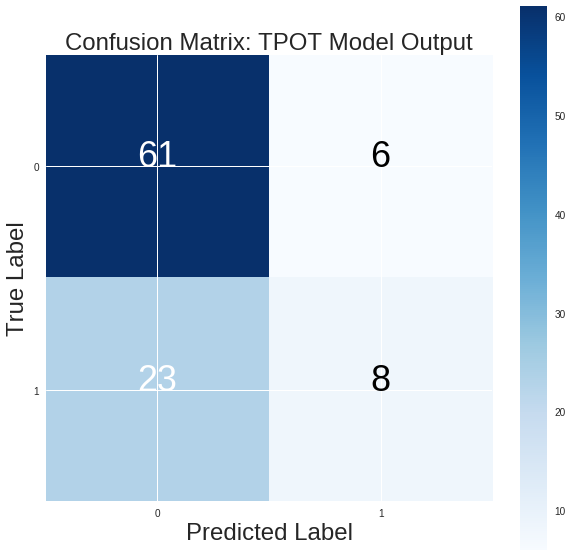

In [139]:
show_cf(y_test, results, model_name = 'TPOT Model Output')

In [0]:
from sklearn.dummy import DummyClassifier

In [0]:
mod = DummyClassifier()


In [230]:
mod.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [0]:
preds = mod.predict(X_test)

In [232]:
accuracy_score(y_test, preds )

0.5714285714285714

In [235]:
y_test.mean()

0.3163265306122449

In [236]:
preds.mean()

0.29591836734693877